## Importing Libraries ####

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('new_churn_data.csv')

 Data Preparation

In [3]:
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

One-Hot Encoding

In [4]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [6]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [8]:
dataset = pd.get_dummies(dataset)

In [9]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [10]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      26996 non-null  int64  
 1   age                        26996 non-null  float64
 2   deposits                   26996 non-null  int64  
 3   withdrawal                 26996 non-null  int64  
 4   purchases_partners         26996 non-null  int64  
 5   purchases                  26996 non-null  int64  
 6   cc_taken                   26996 non-null  int64  
 7   cc_recommended             26996 non-null  int64  
 8   cc_disliked                26996 non-null  int64  
 9   cc_liked                   26996 non-null  int64  
 10  cc_application_begin       26996 non-null  int64  
 11  app_downloaded             26996 non-null  int64  
 12  web_user                   26996 non-null  int64  
 13  ios_user                   26996 non-null  int

## Splitting into train and test data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

## Balancing the Training Set

In [14]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [15]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [16]:
pos_index

Int64Index([11695, 19766,  8354, 17883, 25149,   730, 23229, 20076, 21014,
             5559,
            ...
            24152, 18606, 10327, 18983, 17089, 15832, 14935, 20757, 24275,
            13123],
           dtype='int64', length=8940)

In [17]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [19]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [20]:
new_indexes

array([11695, 19766,  8354, ...,   996,  3602, 17910], dtype=int64)

In [21]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model Building ####

Fitting Model to the Training Set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting Test Set

In [24]:
y_pred = classifier.predict(X_test)

Evaluating Results

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

0.6160664819944598

Test Data Accuracy: 0.6150


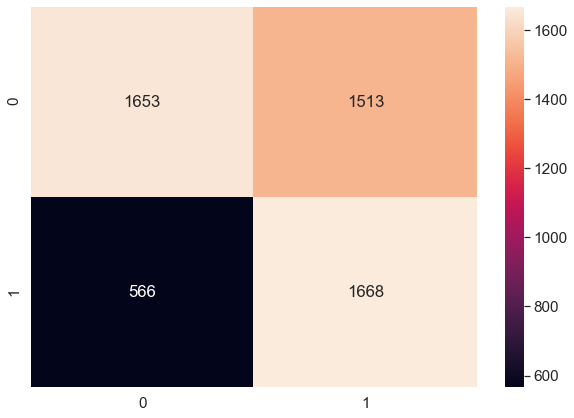

In [26]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Applying k-Fold Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.647 (+/- 0.014)


Analyzing Coefficients

In [ ]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

## Feature Selection ####

 Feature Selection<br>
Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Model to Test

In [ ]:
classifier = LogisticRegression()
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

New Correlation Matrix

In [ ]:
sn.set(style="white")

Compute the correlation matrix

In [ ]:
corr = X_train[X_train.columns[rfe.support_]].corr()

Generate a mask for the upper triangle

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

Set up the matplotlib figure

In [ ]:
f, ax = plt.subplots(figsize=(18, 15))

Generate a custom diverging colormap

In [ ]:
cmap = sn.diverging_palette(220, 10, as_cmap=True)

Draw the heatmap with the mask and correct aspect ratio

In [ ]:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    

Fitting Model to the Training Set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

Predicting Test Set

In [ ]:
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

Evaluating Results

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

In [ ]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Analyzing Coefficients

In [ ]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

## End of Model ####

Formatting Final Results

In [ ]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)